In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

## Diagonal Matrix

In [2]:
# Main Diagonal Entry
x = np.array([1,2,3])
# Diagonal Maxtirx : input은 Vector 형태, 경우에 따라 flatten() 사용
print(np.diag(x)) 

[[1 0 0]
 [0 2 0]
 [0 0 3]]


## Set Parameter

In [3]:
# set params
N, n_feature = 1000, 5   # total Data size , Feature Length
batch_size   = 32        # Batch size
n_batch      = N//32  # Drop Last
lr = 0.03

# Single Neuron
t_W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
w   = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
b   = np.random.uniform(-1, 1, 1).reshape(1, 1)

print('weight shape & bias shape : ', w.shape, b.shape)  # column Vector

epochs = 50

weight shape & bias shape :  (5, 1) (1, 1)


## Generate Dataset

In [4]:
# input data
x_data = np.random.randn(N, n_feature)   # Each Data : Row Vector
y_data = x_data @ t_W + t_b

print('input shape & output shape', x_data.shape, x_data.shape)

input shape & output shape (1000, 5) (1000, 5)


## Training

In [5]:
J_list = list()
W_list, b_list = list(), list()

for epoch in range(epochs):
    for b_idx in range(n_batch):
        X = x_data[b_idx*batch_size:(b_idx+1)*batch_size, ...] # (batch_size,5)
        Y = y_data[b_idx*batch_size:(b_idx+1)*batch_size, ...] # (batch_size,1)
        #print(X.shape, Y.shape)
        W_list.append(w)
        b_list.append(b)
    
        # Foward Propagation
        Pred = X @ w+ b
        J0 = (Y - Pred)**2
        J = np.mean(J0)         # MSE
        J_list.append(J)
        # print(J.shape)        # Scalar

        # jacobians
        dJ_dJ0 = 1/batch_size*np.ones((1, batch_size))         # M  : vector function -> Gradient      1 x N
        dJ0_dPred = np.diag(-2*(Y - Pred).flatten())  # SE : element-size Function Vector     N x N
        dPred_dW = X                                  # Vector Funciton / vector              N x n_feature
        dPred_db = np.ones((batch_size, 1))           # vector Function / scalar              N x 1
        #print(dJ_dJ0.shape,dJ0_dPred.shape)
        
        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred                 # 1 x N
        dJ_dW = dJ_dPred @ dPred_dW                   # 1 x n_feature
        dJ_db = dJ_dPred @ dPred_db                   # 1 x 1
         
        # parameter update
        w = w - lr*dJ_dW.T                            # weight : column Vector
        b = b - lr*dJ_db                              # bias : scalar
        
W_list = np.hstack(W_list)              # Column wise concatenate
b_list = np.concatenate(b_list)

## Visualization

- Mini Batch의 도입으로 Weight & Bias Tracking, Fluctuation현상이 줄어든 모습을 확인 가능

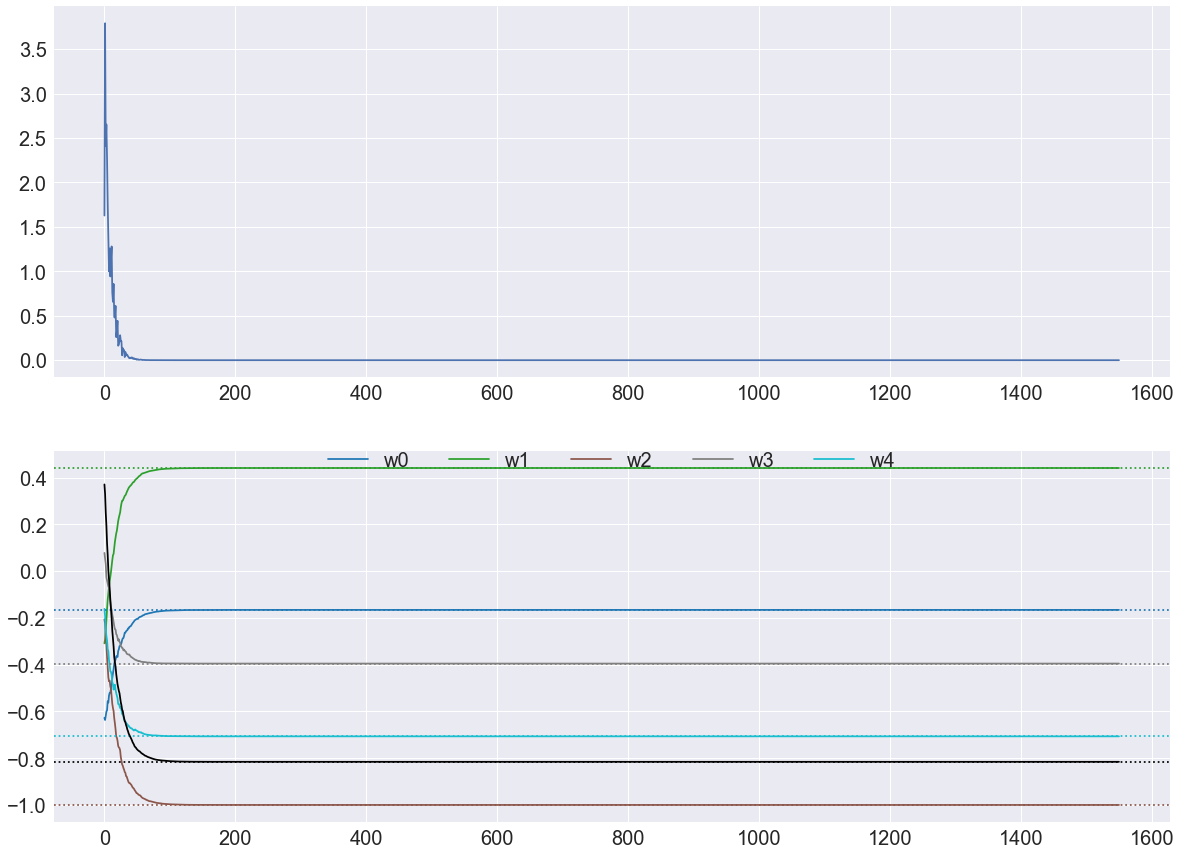

In [6]:
cmap = plt.get_cmap('tab10', n_feature)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(J_list)

# learned Weight
for w_idx, w_list in enumerate(W_list):
    axes[1].plot(w_list, color=cmap(w_idx), label='w' + str(w_idx))
# target Weight
for w_idx, t_w in enumerate(t_W):
    axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
# Bias
axes[1].plot(b_list, color='black')
axes[1].axhline(y=t_b, linestyle=':', color='black')

axes[1].legend(fontsize=20, loc='lower center',bbox_to_anchor=(0.5, 0.9), ncol=n_feature)
axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20)